In [7]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [10]:
np.random.seed(1)
X, _ = make_blobs(n_samples=200, centers=1, cluster_std=0.3, center_box=(10, 10))
model = LocalOutlierFactor(n_neighbors=20)

In [11]:
y_pred = model.fit_predict(X)
lof_scores = model.negative_outlier_factor_

In [12]:
thresh = np.quantile(lof_scores, 0.03)
print("Threshold:", thresh)

Threshold: -1.819148296090704


In [13]:
outlier_indices = np.where(lof_scores <= thresh)
outlier_values = X[outlier_indices]

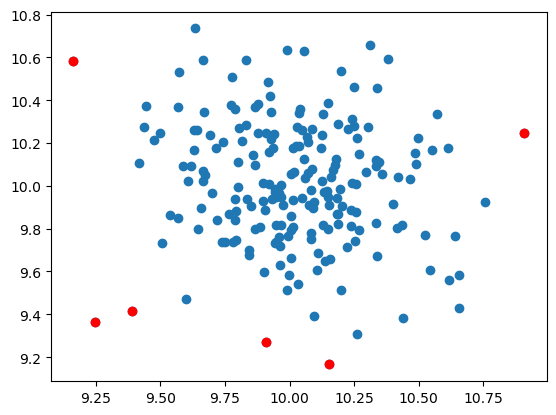

In [14]:

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(outlier_values[:, 0], outlier_values[:, 1], color='r')
plt.show()

In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [16]:
np.random.seed(42)
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

In [19]:
import numpy as np
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1


In [20]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

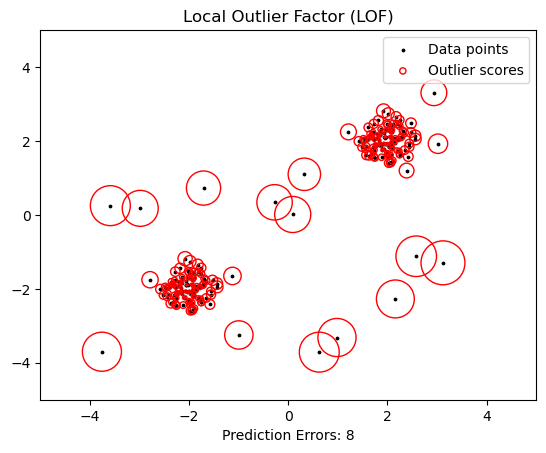

In [26]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection

def update_legend_marker_size(handle, orig):
    """Customize size of the legend marker"""
    handle.update_from(orig)
    handle.set_sizes([20])
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores"
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("Prediction Errors: %d" % (n_errors))
handler_map = {scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
plt.legend(handler_map=handler_map)

plt.title("Local Outlier Factor (LOF)")
plt.show()